# 1. Introduction to Parallel Thinking (25 points)


#### By Jiahui Tang 

### 1.1. Revenge on the Campus Store
Frustrated with the rising cost of textbooks, you have decided to enact revenge on the campus
bookstore; you will pay for your textbooks with a suitcase full of small bags of pennies. Although each
bag is correctly labeled with the number of pennies inside it, there are quite a few bags, and the
cashiers must sum their totals to verify you are providing the correct amount of money. Armed with
their calculators, it takes them 1 second to add two numbers (assume one person can only add two
numbers at a time).
1. If one cashier were to add the totals of 256 bags, how long would it take?
2. Seven of the cashier’s coworkers approach to see this ridiculous sight. The bright (and perhaps a bit
opportunistic) cashier recruits them to help count. By working together, can they verify the total
sum faster than the original cashier by herself? If so, how fast can they do this?
3. Imagine the store is big. . . very big. As a matter of fact, the store can hold an arbitrary number of
em ployees. How fast can the employees verify the sum? That is, what are the optimal counting time
and number of employees?
4. If you were feeling especially frustrated, perhaps you may use more than 256 bags. Instead, assume
there are N bags. (a) How long will it take an arbitrary number of employees, E, to count the N
bags? Derive a general mathematical expression in terms of N and E where E is a fixed and finite
number but it could get as big as "needed". (b) Using Python, plot the result with bag count on the
horizontal and counting time on the vertical. On the plot, create separate curves (around 5 or 6 will
do) for different values of E. On the same graph, plot the time it would take the lone cashier to do
this by herself.
Hint: You can use the ceil( ) function in the mathematical expression that you derived.
5. We’ve been neglecting any overhead associated with people communicating. How does the answer
to question 3, for 256 bags, change, if it takes one second to communicate a number between two
employees?
6. Also, while still assuming an arbitrary number of employees, assume it takes one second to hand a
bag (or any number of bags) between two people (including from you to a cashier). How long will it
take to verify 256 bags worth of coins if each cashier comes to you and takes 1 bag? What about 2
bags? Is there a better strategy? Assume you can’t be handing bags to more than one person at a
time. Note that, in practice, part of the counting could already start while the handing over of bags
is still taking place, but assume that this does not happen in our simulation .

1.If one cashier were to add the totals of 256 bags, how long would it take?

> By adding total of 256 bags, it requires $256 - 1 = 255$ operations.

> Thus it taks $$255 * 1 = 255 $$ seconds


2.Seven of the cashier’s coworkers approach to see this ridiculous sight. The bright (and perhaps a bit opportunistic) cashier recruits them to help count. By working together, can they verify the total sum faster than the original cashier by herself? If so, how fast can they do this?

> By working together and sum numbers in parallel (8 person works at the same time), they could verify the total sum faster than the original cashier by herself. 

> Each of the person could take care of summing up $256/8=32$ bags, which takes $1*(32-1) = 31$ seconds.

> At the last, they could also work in parallel to sum up the results from 8 bags, which could take $(log_2 8) * 1 = 3$ seconds

> In total, it requires $31+3 = 34$ seconds, which is 221 seconds faster than cashier doing this alone.

3.Imagine the store is big. . . very big. As a matter of fact, the store can hold an arbitrary number of employees. How fast can the employees verify the sum? That is, what are the optimal counting time and number of employees?

> If they could have arbitary number of employees, we could always do the maximum operation ($n/2$) at each round, and in total it takes $log_2 256 = 8$ seconds to verify the sum.

> Optimal counting time would be 8 seconds, number of employee would be 128 people.

4.If you were feeling especially frustrated, perhaps you may use more than 256 bags. Instead, assume there are N bags. (a) How long will it take an arbitrary number of employees, E, to count the N bags? Derive a general mathematical expression in terms of N and E where E is a fixed and finite number but it could get as big as "needed". (b) Using Python, plot the result with bag count on the horizontal and counting time on the vertical. On the plot, create separate curves (around 5 or 6 will do) for different values of E. On the same graph, plot the time it would take the lone cashier to do this by herself. Hint: You can use the ceil( ) function in the mathematical expression that you derived.

(a)
When E is a fixed and finite arbitrary number, we could divide them into 2 cases:

When E >= N/2,
a general mathematical expression for time it takes to count N bags is 

$$ceil(log_2 N)$$

When E < N/2,
Every person could count 
$$floor(N/E)$$ bags, which takes $$floor (N/E)-1$$ unit time to count

Next, we need to add these E numbers together. Besides, there are still $N mod E$ bags leftover for them to count after finishing count $floor(N/E)*E$ bags , which takes together:

$$ceil(log_2 (E + N \mod E))$$


In total, it takes 
$$floor (N/E)-1 + ceil(log_2 (E + N \mod E)) $$


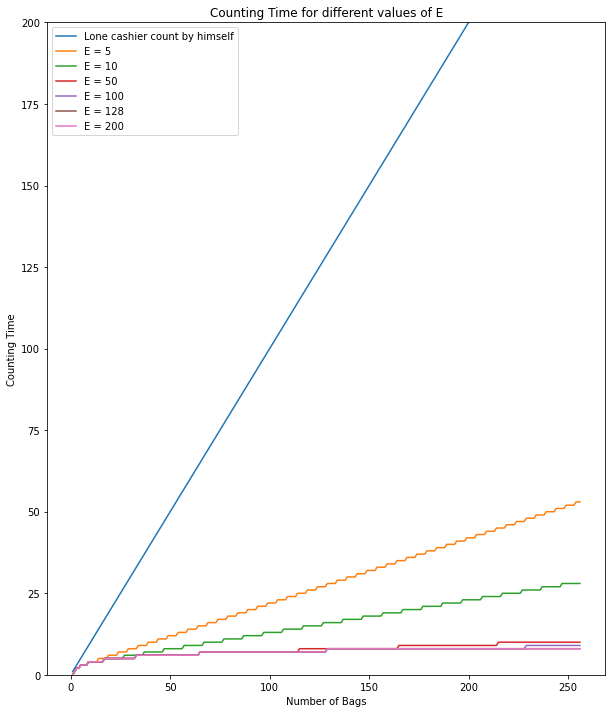

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math

# evenly sampled bag count 
n = np.linspace(1, 256, 256)

# when E >= 128, 
ln = np.ceil(np.log2(n))

# when E = 100, for N = 0~200, it's 𝑐𝑒𝑖𝑙(𝑙𝑜𝑔2𝑁), 
# for N = 200+, it's floor(𝑁/𝐸)−1+ceil(log2(E+N%%E))
e_100 = [np.ceil(np.log2(i)) if i<=200 
         else np.floor(i/100)-1+np.ceil(np.log2(100+np.mod(i,100))) for i in n]

# when E = 50, for N = 0~100, it's 𝑐𝑒𝑖𝑙(𝑙𝑜𝑔2𝑁), 
# for N = 100+, it's floor(𝑁/𝐸)−1+ceil(log2(E+N%%E))
e_50 = [np.ceil(np.log2(i)) if i<=100 
        else np.floor(i/50)-1+np.ceil(np.log2(50+np.mod(i,50))) for i in n]

# when E = 10, for N = 0~20, it's 𝑐𝑒𝑖𝑙(𝑙𝑜𝑔2𝑁), 
# for N = 20+, it's floor(𝑁/𝐸)−1+ceil(log2(E+N%%E))
e_10 = [np.ceil(np.log2(i)) if i<=20 
        else np.floor(i/10)-1+np.ceil(np.log2(10+np.mod(i,10))) for i in n]

# when E = 5, for N = 0~10, it's 𝑐𝑒𝑖𝑙(𝑙𝑜𝑔2𝑁), 
# for N = 10+, it's floor(𝑁/𝐸)−1+ceil(log2(E+N%%E))
e_5 = [np.ceil(np.log2(i)) if i<=10 
       else np.floor(i/5)-1+np.ceil(np.log2(5+np.mod(i,5))) for i in n]



# red dashes, blue squares and green triangles
plt.figure(figsize = (10,12))
plt.plot(n, n, label="Lone cashier count by himself")

plt.plot(n, e_5, label="E = 5")
plt.plot(n, e_10, label="E = 10")
plt.plot(n, e_50, label="E = 50")
plt.plot(n, e_100, label="E = 100")
plt.plot(n, ln, label="E = 128")
plt.plot(n, ln, label="E = 200")
plt.ylim(0, 200)


plt.xlabel('Number of Bags')
plt.ylabel('Counting Time')
plt.title("Counting Time for different values of E")
plt.legend()

5.We’ve been neglecting any overhead associated with people communicating. How does the answer to question 3, for 256 bags, change, if it takes one second to communicate a number between two employees?

> If they could have arbitary number of employees, we could always do the maximum operation ($n/2$) at each round, and in total it takes $log_2 256 = 8$ seconds (i.e. 8 rounds) to verify the sum.

> For communication, for the top 7 rounds in binary tree, each round, two employee communicate a number and add them together. For example, theortically,  after 128 employees add 256 bags into 128 numbers, half of them (64) will tell the other half their number, and then the rest half will add two numbers together.

Thus for the next 7 rounds, every round it takes 1 seconds for half people to communicate parallelly, it takes additional $7*1 = 7$ seconds to communicate. For the lowest level (the 8th round) in binary tree, 128 employ does calculation by themselves without communication overhead. So it takes $0$ seconds.

> In total, it takes $7$ seconds more.

> Optimal counting and communication time would be $15$ seconds, number of employee would still be 128 people.

6.Also, while still assuming an arbitrary number of employees, assume it takes one second to hand a bag (or any number of bags) between two people (including from you to a cashier). How long will it take to verify 256 bags worth of coins if each cashier comes to you and takes 1 bag? What about 2 bags? Is there a better strategy? Assume you can’t be handing bags to more than one person at a time. Note that, in practice, part of the counting could already start while the handing over of bags is still taking place, but assume that this does not happen in our simulation.

**Assuming the assumption in question 5 no longer hold here, i.e. No overhead in people communication**

**The answer is on the basis of question 3**

> Since it takes one second to hand a bag between two people.
> If each cashier comes to you and takes 1 bag, it takes an additional 256 seconds to distribute bags to cashiers. Thus on top of question 3, it takes 264 seconds to verify.

> If each cashier comes to you and takes 2 bag, it takes an additional 128 seconds to distribute bags to cashiers. Thus on top of question 3, it takes 136 seconds to verify.


**Better Strategy**:
> The current strategy's input overhead is too big and steal time. Given that we assume counting hasn't start while the handing over of bags is still taking place, we could probably trade later concurrency and degree of parallelism with the input overhead.
For example, if we have 64 cashiers, and give 4 bags to each. Then the overhead for handing bags is only 64 seconds, while the calculation time only increase by 1 seconds. This is a better strategy comparing to the current. (Of course there will be other better strategy, the one I put here is not the best strategy but an example that does better than the current 128 person version)